<a href="https://colab.research.google.com/github/thefr33radical/hybrid_forecasting/blob/master/code/ARIMA_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:

#!pip install statsmodels
import pandas as pd 
import numpy as np
from google.colab import files
import io
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

data = files.upload()
data = pd.read_csv(io.BytesIO(data["sunspot.csv"]),index_col=0)
print(data.columns)

data=data.set_index("time")

print(data)


Saving sunspot.csv to sunspot (2).csv
Index(['time', 'value'], dtype='object')
      value
time       
1700    5.0
1701   11.0
1702   16.0
1703   23.0
1704   36.0
1705   58.0
1706   29.0
1707   20.0
1708   10.0
1709    8.0
1710    3.0
1711    0.0
1712    0.0
1713    2.0
1714   11.0
1715   27.0
1716   47.0
1717   63.0
1718   60.0
1719   39.0
1720   28.0
1721   26.0
1722   22.0
1723   11.0
1724   21.0
1725   40.0
1726   78.0
1727  122.0
1728  103.0
1729   73.0
...     ...
1959  159.0
1960  112.3
1961   53.9
1962   37.5
1963   27.9
1964   10.2
1965   15.1
1966   47.0
1967   93.8
1968  105.9
1969  105.5
1970  104.5
1971   66.6
1972   68.9
1973   38.0
1974   34.5
1975   15.5
1976   12.6
1977   27.5
1978   92.5
1979  155.4
1980  154.7
1981  140.5
1982  115.9
1983   66.6
1984   45.9
1985   17.9
1986   13.4
1987   29.2
1988  100.2

[289 rows x 1 columns]


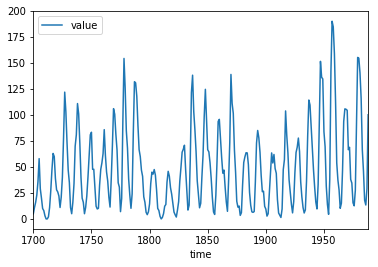

In [72]:
data.plot()
plt.show()



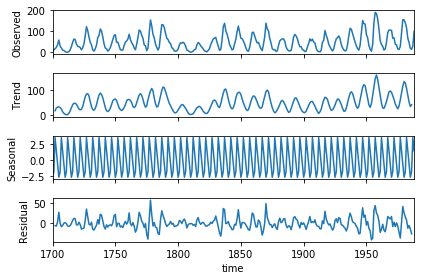

In [73]:
ndata= seasonal_decompose(data,model="additive",freq=5)
ndata.plot()
plt.show()


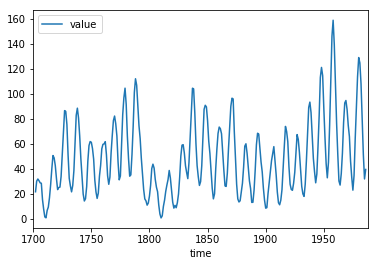

In [74]:
linear_data = ndata.trend+ ndata.seasonal 
linear_data.plot()
plt.show()



In [0]:
from statsmodels.tsa.arima_model import ARIMA

train_data =  data.iloc[:100,:]
test_data =  data.iloc[101:,:]

x_train = train_data[:-1]
y_train = train_data[1:]

model_arima = ARIMA(data, order=(5,1,0))
model_fit = model_arima.fit(disp=0)
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
model_fit.summary()

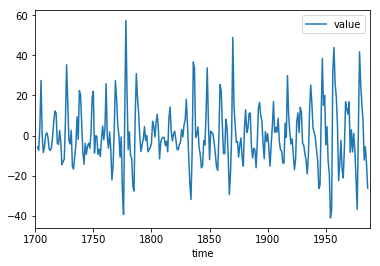

In [75]:
non_linear_data = ndata.resid
non_linear_data.plot()
plt.show()

* https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
* https://anomaly.io/seasonal-trend-decomposition-in-r/
* Text Books - Forecasting: Principles and Practice https://otexts.com/fpp2/

In [107]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score,mean_squared_error as ms
from sklearn.preprocessing import MinMaxScaler

#train_data =  non_linear_data.iloc[5:100,:]
#test_data =  non_linear_data.iloc[101:-5,:]

train_data =  data.iloc[:221,:]
test_data =  data.iloc[222:,:]

#scaler = MinMaxScaler(feature_range=(-1, 1))
#train_data = scaler.fit_transform(train_data)
#test_data = scaler.fit_transform(test_data)

x_train = train_data[:-1]
y_train = train_data[1:]

x_test = test_data[:-1]
y_test = test_data[1:]

model = Sequential()
model.add(Dense(100,input_dim=1,activation="relu"))
model.add(Dense(200))
model.add(Dense(200))
model.add(Dense(200))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")
early_stop = EarlyStopping(monitor ="loss",patience =20, verbose =1)
model.fit(x_train,y_train, epochs =500, batch_size=20,verbose=0,shuffle= False)
y_test_pred = model.predict(x_test)

y_train_pred = model.predict(x_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(ms(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(ms(y_test, y_test_pred)))

The R2 score on the Train set is:	392.163
The R2 score on the Test set is:	924.336
